In [26]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Documents/injury data cleaned copy.csv')

X = pd.DataFrame(dataset.iloc[:,1:19].values)
Y = pd.DataFrame(dataset.iloc[:,19:].values)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X, Y = sm.fit_resample(X, Y)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(Y_train.shape)

       0   1   2   3   4   5    6   7   8   9   10  11  12  13  14  15  16  17
0       1   1   5   1  16   0  106   1   2  13   3  20   0   0   0   0   2   5
1       1  10  12  10  15   2  104   2   2  13   3   8   0   1   0   0   1   5
2       2   1   9  24  21   6  103   2   2  13   3   8   0   0   0   0   1   3
3       1   1  12   9   8   2  102   1   1  11   3   8   0   0   0   0   2   3
4       2   1   6   3  13   1  101   1   2  13   3   8   0   0   0   0   2   4
...    ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
19183   2   1  10  24   6   7   68   2   1  11   3   6   0   0   0   0   1   3
19184   1   1   8  18  17   6   65   1   1  11   6   8   0   0   0   0   1   3
19185   2  10   8   6  14   2   62   1   1  11   2   7   0   0   0   0   1   3
19186   2   1   8  21   9   1   79   1   1  11   3   8   0   0   0   0   1   2
19187   1   1   8  24  14   1   75   1   1  13  20  20   0   1   0   0   1   4

[19188 rows x 18 columns]
       0
0      2
1      

In [27]:
features = pd.DataFrame(dataset.iloc[:,1:19])
features = features.columns
print(features)

Index(['LGT_COND', 'WEATHER', 'MONTH', 'DAY', 'HOUR', 'MAN_COLL', 'AGE', 'SEX',
       'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'EJECTION', 'EXTRICAT',
       'DRINKING', 'DRUGS', 'RUR_URB', 'FUNC_SYS'],
      dtype='object')


In [28]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier

In [29]:
model = MLPClassifier(max_iter=50000, tol=1e-5)
model.fit(X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=50000, tol=1e-05)

In [30]:
res = model.predict(X_test)
print(res)
print(Y_test)

[1 2 0 ... 0 2 0]
       0
19043  1
18181  1
11835  0
3068   2
4594   1
...   ..
4801   2
17230  1
8117   1
1373   2
13545  0

[3838 rows x 1 columns]


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.7542991141219385
              precision    recall  f1-score   support

           0   0.741304  0.816441  0.777060      1253
           1   0.694374  0.658439  0.675930      1256
           2   0.824783  0.786305  0.805085      1329

    accuracy                       0.754299      3838
   macro avg   0.753487  0.753729  0.752692      3838
weighted avg   0.754853  0.754299  0.753669      3838



In [32]:
model.predict_proba(X_test)

array([[0.43532744, 0.5527692 , 0.01190336],
       [0.06164018, 0.13632074, 0.80203908],
       [0.67894406, 0.28355688, 0.03749906],
       ...,
       [0.7569292 , 0.19707358, 0.04599722],
       [0.02419514, 0.46792811, 0.50787675],
       [0.94667236, 0.0436037 , 0.00972394]])

[1 2 0 ... 0 2 0]
       0
19043  1
18181  1
11835  0
3068   2
4594   1
...   ..
4801   2
17230  1
8117   1
1373   2
13545  0

[3838 rows x 1 columns]


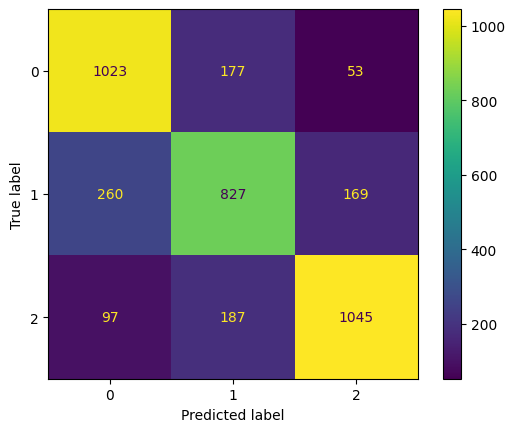

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

res = np.array(res)
print(res)
print(Y_test)
cm = confusion_matrix(Y_test, res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [34]:
# import shap
# explainer = shap.Explainer(model.predict, X_test)
# shap_values = explainer(X_test)
# shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)